In [1]:
import pandas as pd
df = pd.read_csv('C:/CUB/sem2/ml/proj/CN_Dataset/cleaned_data.csv')


In [2]:
columns_to_convert = [
    'SuggestedJobRole', 'keywords', 'workshops', 'reading and writing skills', 'memory capability score','certifications',
    'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical',
    'hard/smart worker'
]

# Convert columns to category dtype
for column in columns_to_convert:
    df[column] = df[column].astype('category')

# Check the new data types
print(df.dtypes)    

SuggestedJobRole                       category
keywords                               category
Logical quotient rating                   int64
hackathons                                int64
coding skills rating                      int64
public speaking points                    int64
self-learning capability?                object
Extra-courses did                        object
certifications                         category
workshops                              category
reading and writing skills             category
memory capability score                category
Interested subjects                    category
interested career area                 category
Type of company want to settle in?     category
Taken inputs from seniors or elders      object
Interested Type of Books               category
Management or Technical                category
hard/smart worker                      category
worked in teams ever?                    object
Introvert                               

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


le = LabelEncoder()
df['SuggestedJobRole'] = le.fit_transform(df['SuggestedJobRole'])


In [4]:
# Features for Multinomial Naive Bayes
features_multinomial = ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']
X_multinomial = df[features_multinomial]
y = df['SuggestedJobRole']

# Split the data for Multinomial Naive Bayes
X_train_mn, X_test_mn, y_train, y_test = train_test_split(X_multinomial, y, test_size=0.2, random_state=42)

# Features for Bernoulli Naive Bayes
features_bernoulli = ['self-learning capability?', 'Extra-courses did', 'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert']
df[features_bernoulli] = df[features_bernoulli].apply(lambda x: x.map({'yes': 1, 'no': 0}))
X_bernoulli = df[features_bernoulli]
print(X_bernoulli)

# Split the data for Bernoulli Naive Bayes
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bernoulli, y, test_size=0.2, random_state=42)

# Features for Categorical Naive Bayes
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
# categorical_columns.remove('SuggestedJobRole')
X_categorical = df[categorical_columns]

# Encode categorical features
X_categorical = X_categorical.apply(lambda col: LabelEncoder().fit_transform(col))
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y, test_size=0.2, random_state=42)


      self-learning capability?  Extra-courses did  \
0                             0                  1   
1                             0                  1   
2                             1                  1   
3                             1                  1   
4                             1                  0   
...                         ...                ...   
9995                          0                  0   
9996                          0                  0   
9997                          0                  0   
9998                          0                  0   
9999                          0                  0   

      Taken inputs from seniors or elders  worked in teams ever?  Introvert  
0                                       0                      0          1  
1                                       0                      0          1  
2                                       0                      0          1  
3                                      

In [5]:
# Multinomial Naive Bayes
model_mn = MultinomialNB()
model_mn.fit(X_train_mn, y_train)
predictions_mn = model_mn.predict(X_test_mn)
accuracy_mn = accuracy_score(y_test, predictions_mn)

# Bernoulli Naive Bayes
model_bn = BernoulliNB()
model_bn.fit(X_train_bn, y_train_bn)
predictions_bn = model_bn.predict(X_test_bn)
accuracy_bn = accuracy_score(y_test_bn, predictions_bn)

# Categorical Naive Bayes
model_cat = CategoricalNB()
model_cat.fit(X_train_cat, y_train_cat)
predictions_cat = model_cat.predict(X_test_cat)
accuracy_cat = accuracy_score(y_test_cat, predictions_cat)


Accuracy of Multinomial Naive Bayes: 0.2325
Accuracy of Bernoulli Naive Bayes: 0.226
Accuracy of Categorical Naive Bayes: 0.6175


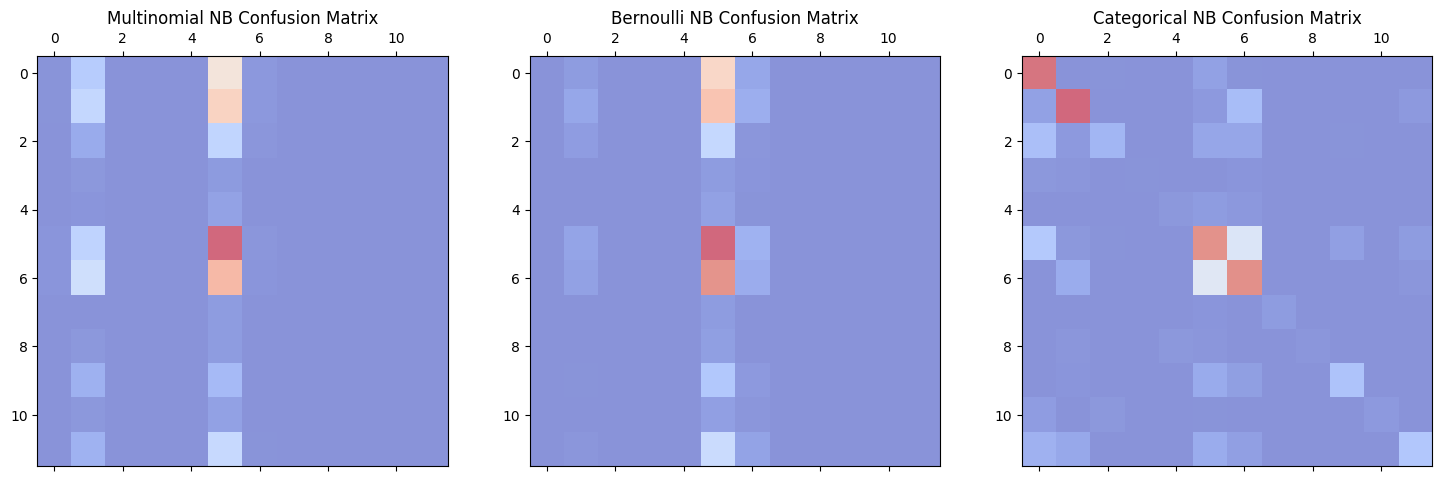

In [6]:
# Print accuracies
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_mn}")
print(f"Accuracy of Bernoulli Naive Bayes: {accuracy_bn}")
print(f"Accuracy of Categorical Naive Bayes: {accuracy_cat}")

# Confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].matshow(confusion_matrix(y_test, predictions_mn), cmap='coolwarm', alpha=0.6)
ax[0].set_title('Multinomial NB Confusion Matrix')
ax[1].matshow(confusion_matrix(y_test_bn, predictions_bn), cmap='coolwarm', alpha=0.6)
ax[1].set_title('Bernoulli NB Confusion Matrix')
ax[2].matshow(confusion_matrix(y_test_cat, predictions_cat), cmap='coolwarm', alpha=0.6)
ax[2].set_title('Categorical NB Confusion Matrix')
plt.show()
